# ML Week 5 Assignment 

Stan Lyubarskiy

## Instructions

The programming assignment for the Decision Tree model is

1. Using the Scikit-Learn Library train the Decision Tree Classifier to the attached PhishingVsBenignURL data set using all of the features at once. (Dataset is originally from here: https://www.unb.ca/cic/datasets/url-2016.html )

2. Run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures for each tree depth. Compare the results of these 12 cases and discuss your results.

3. Take the best performing tree of depth 2 from above. Visualize the tree and discuss your observations. (For visualizing decision trees see: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

As a help for this assignment, please refer to example M5_Decision Trees under resources.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

In [3]:
# read in the data
df = pd.read_csv("DataSetForPhishingVSBenignUrl.csv")

In [4]:
# take a look at the dataset
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [5]:
# Look at the size
df.shape

(36707, 80)

In [6]:
# take a look at the data types and column names and see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [7]:
# Let us look at the number and type of unique values in the last column
df["URL_Type_obf_Type"].value_counts()

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64

In [8]:
# Let us filter out the other classes that are not benign or phishing
df.query("URL_Type_obf_Type in ('benign', 'phishing')",inplace=True)
df

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
7930,0,2,12,5.500000,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
7931,0,3,12,5.000000,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
7932,2,2,11,4.000000,5,4.750000,2,16,11,0,...,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
7933,0,2,7,4.500000,7,5.714286,2,15,10,0,...,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
7934,19,2,10,6.000000,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30004,0,2,3,8.000000,13,3.333333,2,3,2,0,...,0,0,-1,0.797046,0.884870,0.750000,1.000000,0.00000,-1.000000,phishing
30005,0,3,0,9.000000,16,NaN,3,0,0,0,...,-1,-1,-1,0.797564,0.813569,-1.000000,-1.000000,-1.00000,-1.000000,phishing
30006,0,3,2,6.666666,10,3.000000,3,3,2,0,...,0,0,-1,0.791104,0.801139,NaN,1.000000,0.00000,-1.000000,phishing
30007,0,2,3,8.000000,13,3.333333,2,4,2,0,...,0,0,-1,0.716580,0.787659,0.871049,1.000000,0.00000,-1.000000,phishing


In [9]:
# Check to make sure it filtered correctly

df["URL_Type_obf_Type"].value_counts() # we see that the counts match the ones from the original dataset

benign      7781
phishing    7586
Name: URL_Type_obf_Type, dtype: int64

In [10]:
# Let us now drop the rows with the NaN values

df2 = df.dropna()

In [11]:
# we now see that there are no more null values in the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6723 entries, 7930 to 29999
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      6723 non-null   int64  
 1   domain_token_count               6723 non-null   int64  
 2   path_token_count                 6723 non-null   int64  
 3   avgdomaintokenlen                6723 non-null   float64
 4   longdomaintokenlen               6723 non-null   int64  
 5   avgpathtokenlen                  6723 non-null   float64
 6   tld                              6723 non-null   int64  
 7   charcompvowels                   6723 non-null   int64  
 8   charcompace                      6723 non-null   int64  
 9   ldl_url                          6723 non-null   int64  
 10  ldl_domain                       6723 non-null   int64  
 11  ldl_path                         6723 non-null   int64  
 12  ldl_filename    

In [12]:
# reset the index so it does not look out of order
df2.reset_index(drop=True, inplace=True)

In [13]:
df2.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,19,2,10,6.0,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign
3,0,2,10,5.5,9,4.100000,2,15,11,0,...,-1,-1,-1,0.732981,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
4,0,2,9,2.5,3,4.555555,2,6,3,0,...,1,0,-1,0.742606,1.000000,0.785719,0.808833,1.00000,-1.000000,benign


In [14]:
# count the unique classes after removing NaN
df2["URL_Type_obf_Type"].value_counts()

phishing    4014
benign      2709
Name: URL_Type_obf_Type, dtype: int64

In [15]:
# check the distribution and summary stats for the data
df2.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,...,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000,6723.000000
mean,5.480589,2.494571,8.661312,5.707488,9.656850,4.866267,2.494571,12.216421,8.273687,2.181020,...,2.077941,1.806634,0.925033,0.075413,0.723158,0.856102,0.553457,0.610132,0.612949,-0.689823
std,19.506742,0.838893,4.531253,1.731904,4.484649,2.186231,0.838893,8.795878,7.105554,5.687366,...,2.369383,3.188621,3.075230,3.069772,0.049545,0.069153,0.625535,0.650268,0.663927,0.675634
min,0.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.617120,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,5.000000,4.500000,7.000000,3.777778,2.000000,5.000000,3.000000,0.000000,...,1.000000,1.000000,0.000000,-1.000000,0.688141,0.803422,0.703097,0.732997,0.579380,-1.000000
50%,0.000000,2.000000,8.000000,5.666666,9.000000,4.250000,2.000000,10.000000,6.000000,0.000000,...,1.000000,1.000000,0.000000,-1.000000,0.725888,0.860529,0.788698,0.863489,0.965872,-1.000000
75%,0.000000,3.000000,11.000000,6.333334,11.000000,5.222222,3.000000,17.000000,11.000000,2.000000,...,3.000000,1.000000,0.000000,-1.000000,0.761501,0.916850,0.871049,0.929897,1.000000,-1.000000
max,173.000000,15.000000,68.000000,26.000000,63.000000,33.750000,15.000000,94.000000,57.000000,58.000000,...,24.000000,31.000000,30.000000,29.000000,0.857273,1.000000,0.962479,1.000000,1.000000,1.000000


In [16]:
# save the feature names and class names for graphing
feature_names = df2.columns[:-1]
class_names = df2["URL_Type_obf_Type"].unique()
print("Features:",feature_names)
print("Classes:",class_names)

Features: Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'Longes

In [17]:
# assign my X and Y
Y = df2.iloc[:, -1].values
Y = np.where((Y == "phishing"), 1, 0)

X = df2.iloc[:,0:-1].values

In [48]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([2709, 4014], dtype=int64))

In [18]:
# split the data into 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [19]:
# check the shape of the data
print("Size of X_train:",X_train.shape, "Size of Y_train:", y_train.shape)
print("Size of X_test:",X_test.shape, "Size of Y_test:", y_test.shape)

Size of X_train: (4706, 79) Size of Y_train: (4706,)
Size of X_test: (2017, 79) Size of Y_test: (2017,)


# Decision Tree Classifiers with a Depth of 1

In [20]:
# Decision Tree classifier with criteria - Gini Index
tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=1)
tree_gini.fit(X_train, y_train)
%timeit tree_gini.fit(X_train, y_train)

12.4 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
# Accuracy for Decision Tree classifier with criterion as gini index and max depth of 1
print("Training Accuracy for Gini: ", tree_gini.score(X_train, y_train)*100)
print("Test Accuracy for Gini: ", tree_gini.score(X_test, y_test)*100)

Training Accuracy for Gini:  79.60050998725032
Test Accuracy for Gini:  80.51561725334655


In [22]:
# Decision Tree classifier with criteria - Entropy and max depth of 1
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,max_depth=1)
tree_entropy.fit(X_train, y_train)
%timeit tree_entropy.fit(X_train, y_train)

14.9 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Training Accuracy for Entropy: ", tree_entropy.score(X_train, y_train)*100)
print("Test Accuracy for Entropy: ", tree_entropy.score(X_test, y_test)*100)

Training Accuracy for Entropy:  79.23926901827454
Test Accuracy for Entropy:  80.3668815071889


## Observation

We began by discarding all the data associated with malware, defacement, and spam URLs. This is because we are only interested in producing a binary classification for phishing vs benign URLs. Next, we dropped all NaN values from the dataset for simplicity. This resulted in 6,723 samples from the overall 15,367 (roughly 44%).

Finally, we fit the decision tree classifier and tested the accuracy for both the Gini and Entropy impurity measures. We began by only using a tree depth of 1. This yieled a slightly higher accuracy for Gini than for Entropy (~80.52% vs ~80.37%, respectively). We expected a low accuracy for such a low tree depth. 

We utilized the timeit magic function to time how long the fit is for each impurity measure. From our research, we know that the Gini index is faster because its simpler and less computationally intensive. Entropy is slower because it uses logarithmic calculations which are more complex and computationally intensive. However, it tends to be slightly more accurate. In this example, Gini was slighly more accurate and faster.

Next, we will test these two impurities using a tree depth of 2.

# Decision Tree Classifiers with a Depth of 2

In [24]:
# Decision Tree classifier with criteria - Gini Index
tree_gini2 = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=2)
tree_gini2.fit(X_train, y_train)
%timeit tree_gini2.fit(X_train, y_train)

22.9 ms ± 509 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
# Accuracy for Decision Tree classifier with criterion as gini index and max depth of 2
print("Training Accuracy for Gini: ", tree_gini2.score(X_train, y_train)*100)
print("Test Accuracy for Gini: ", tree_gini2.score(X_test, y_test)*100)

Training Accuracy for Gini:  87.88780280492988
Test Accuracy for Gini:  87.01041150223104


In [26]:
# Decision Tree classifier with criteria - Entropy and max depth of 2
tree_entropy2 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,max_depth=2)
tree_entropy2.fit(X_train, y_train)
%timeit tree_entropy2.fit(X_train, y_train)

27.1 ms ± 644 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Training Accuracy for Entropy: ", tree_entropy2.score(X_train, y_train)*100)
print("Test Accuracy for Entropy: ", tree_entropy2.score(X_test, y_test)*100)

Training Accuracy for Entropy:  88.03654908627284
Test Accuracy for Entropy:  87.50619732275658


## Observation

With a max depth of 2, Entropy produces slightly better results at 87.5% than Gini at 87%. The training time is still slightly faster for Gini which is expected. We know that decision trees tend to overfit so we need to be mindful of that possibility. However, the testing accuracy is still relatively low so we should not be too concerned yet.

Let us see what a depth of 3 looks like.

# Decision Tree Classifiers with a Depth of 3

In [28]:
# Decision Tree classifier with criteria - Gini Index
tree_gini3 = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=3)
tree_gini3.fit(X_train, y_train)
%timeit tree_gini3.fit(X_train, y_train)

34.3 ms ± 539 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
# Accuracy for Decision Tree classifier with criterion as gini index and max depth of 3
print("Training Accuracy for Gini: ", tree_gini3.score(X_train, y_train)*100)
print("Test Accuracy for Gini: ", tree_gini3.score(X_test, y_test)*100)

Training Accuracy for Gini:  91.62770930726731
Test Accuracy for Gini:  90.67922657411998


In [30]:
# Decision Tree classifier with criteria - Entropy and max depth of 3
tree_entropy3 = DecisionTreeClassifier(criterion = "entropy", random_state = 50, max_depth=3)
tree_entropy3.fit(X_train, y_train)
%timeit tree_entropy3.fit(X_train, y_train)

40.1 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Training Accuracy for Entropy: ", tree_entropy3.score(X_train, y_train)*100)
print("Test Accuracy for Entropy: ", tree_entropy3.score(X_test, y_test)*100)

Training Accuracy for Entropy:  91.26646833829155
Test Accuracy for Entropy:  90.43133366385722


## Observation

As the tree grows with more nodes, so does the overall training time which makes sense. The increasing depth of the tree is also increasing the complexity of the model and subsequent calculations. Furthermore, we know that a tree can possibilly grow infinitely if we do not specifiy the max depth and as it grows it tends to overfit over time.

In this example, the accuracy for both models rose slightly above 90 percent which is significantly better than we saw for a depth of one. Interestingly, Gini had a slightly better accuracy this time.

Let us keep going and growing the tree.

# Decision Tree Classifiers with a Depth of 4

In [32]:
# Decision Tree classifier with criteria - Gini Index
tree_gini4 = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=4)
tree_gini4.fit(X_train, y_train)
%timeit tree_gini4.fit(X_train, y_train)

45.7 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
# Accuracy for Decision Tree classifier with criterion as gini index and max depth of 4
print("Training Accuracy for Gini: ", tree_gini4.score(X_train, y_train)*100)
print("Test Accuracy for Gini: ", tree_gini4.score(X_test, y_test)*100)

Training Accuracy for Gini:  93.47641308967276
Test Accuracy for Gini:  92.31531978185424


In [34]:
# Decision Tree classifier with criteria - Entropy and max depth of 4
tree_entropy4 = DecisionTreeClassifier(criterion = "entropy", random_state = 50, max_depth=4)
tree_entropy4.fit(X_train, y_train)
%timeit tree_entropy4.fit(X_train, y_train)

53.8 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Training Accuracy for Entropy: ", tree_entropy4.score(X_train, y_train)*100)
print("Test Accuracy for Entropy: ", tree_entropy4.score(X_test, y_test)*100)

Training Accuracy for Entropy:  92.18019549511263
Test Accuracy for Entropy:  91.22459097669807


## Observation

The accuracy continues to improve as we increase the tree size. The training time for both models is also increasing and the difference is becoming more pronounced as the model grows in complexity. We see that Gini is comparatively becoming much faster than Entropy while simultaneously staying more accurate.

This is unexpected as we know that Entropy is generally more accurate than Gini. However, it may not hold true for every dataset and that may be the case here.

# Decision Tree Classifiers with a Depth of 5

In [36]:
# Decision Tree classifier with criteria - Gini Index
tree_gini5 = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=5)
tree_gini5.fit(X_train, y_train)
%timeit tree_gini5.fit(X_train, y_train)

56.3 ms ± 876 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
# Accuracy for Decision Tree classifier with criterion as gini index and max depth of 5
print("Training Accuracy for Gini: ", tree_gini5.score(X_train, y_train)*100)
print("Test Accuracy for Gini: ", tree_gini5.score(X_test, y_test)*100)

Training Accuracy for Gini:  95.6651083722907
Test Accuracy for Gini:  94.6950917203768


In [38]:
# Decision Tree classifier with criteria - Entropy and max depth of 5
tree_entropy5 = DecisionTreeClassifier(criterion = "entropy", random_state = 50, max_depth=5)
tree_entropy5.fit(X_train, y_train)
%timeit tree_entropy5.fit(X_train, y_train)

66.4 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Training Accuracy for Entropy: ", tree_entropy5.score(X_train, y_train)*100)
print("Test Accuracy for Entropy: ", tree_entropy5.score(X_test, y_test)*100)

Training Accuracy for Entropy:  94.56013599660008
Test Accuracy for Entropy:  94.00099157164105


## Observation

As the complexity grows so does the length of computation. This is logical and expected. However, the better performance of Gini is surprising. It is possible that it is overfitting. Perhaps, one or both of the models is emphasing irrelevant features.

# Decision Tree Classifiers with a Depth of 6

In [40]:
# Decision Tree classifier with criteria - Gini Index
tree_gini6 = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=6)
tree_gini6.fit(X_train, y_train)
%timeit tree_gini6.fit(X_train, y_train)

68.6 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
# Accuracy for Decision Tree classifier with criterion as gini index and max depth of 6
print("Training Accuracy for Gini: ", tree_gini6.score(X_train, y_train)*100)
print("Test Accuracy for Gini: ", tree_gini6.score(X_test, y_test)*100)

Training Accuracy for Gini:  96.17509562260943
Test Accuracy for Gini:  94.89340604858701


In [42]:
# Decision Tree classifier with criteria - Entropy and max depth of 6
tree_entropy6 = DecisionTreeClassifier(criterion = "entropy", random_state = 50, max_depth=6)
tree_entropy6.fit(X_train, y_train)
%timeit tree_entropy6.fit(X_train, y_train)

71.8 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
# Accuracy for Decision Tree classifier with criterion as Entropy
print("Training Accuracy for Entropy: ", tree_entropy6.score(X_train, y_train)*100)
print("Test Accuracy for Entropy: ", tree_entropy6.score(X_test, y_test)*100)

Training Accuracy for Entropy:  95.83510412239694
Test Accuracy for Entropy:  95.24045612295488


## Observation

We conclude our experimentation with a max depth of six. Entropy finally came out on top with 95.24 percent vs 94.89 percent for Gini. It took a significantly longer time to complete than Gini.

We find it very surprising and intriguing that Entropy performed better in only two of our six experiments. This contradicts the literature that pegs Entropy as slightly more accurate. Nonetheless, as stated earlier, this may be a function of our dataset and is not generalizable to other use cases.

## Tree Visualization

Here we take the best performing tree of depth 2 which is the Entropy tree and visualize it.

In [49]:
export_graphviz(tree_entropy2, out_file='tree_entropy.dot', feature_names = feature_names,
                class_names = class_names,
                rounded = True, proportion = False, precision = 2, filled = True)

In [50]:
!dot -Tpng tree_entropy.dot -o tree_entropy.png -Gdpi=600

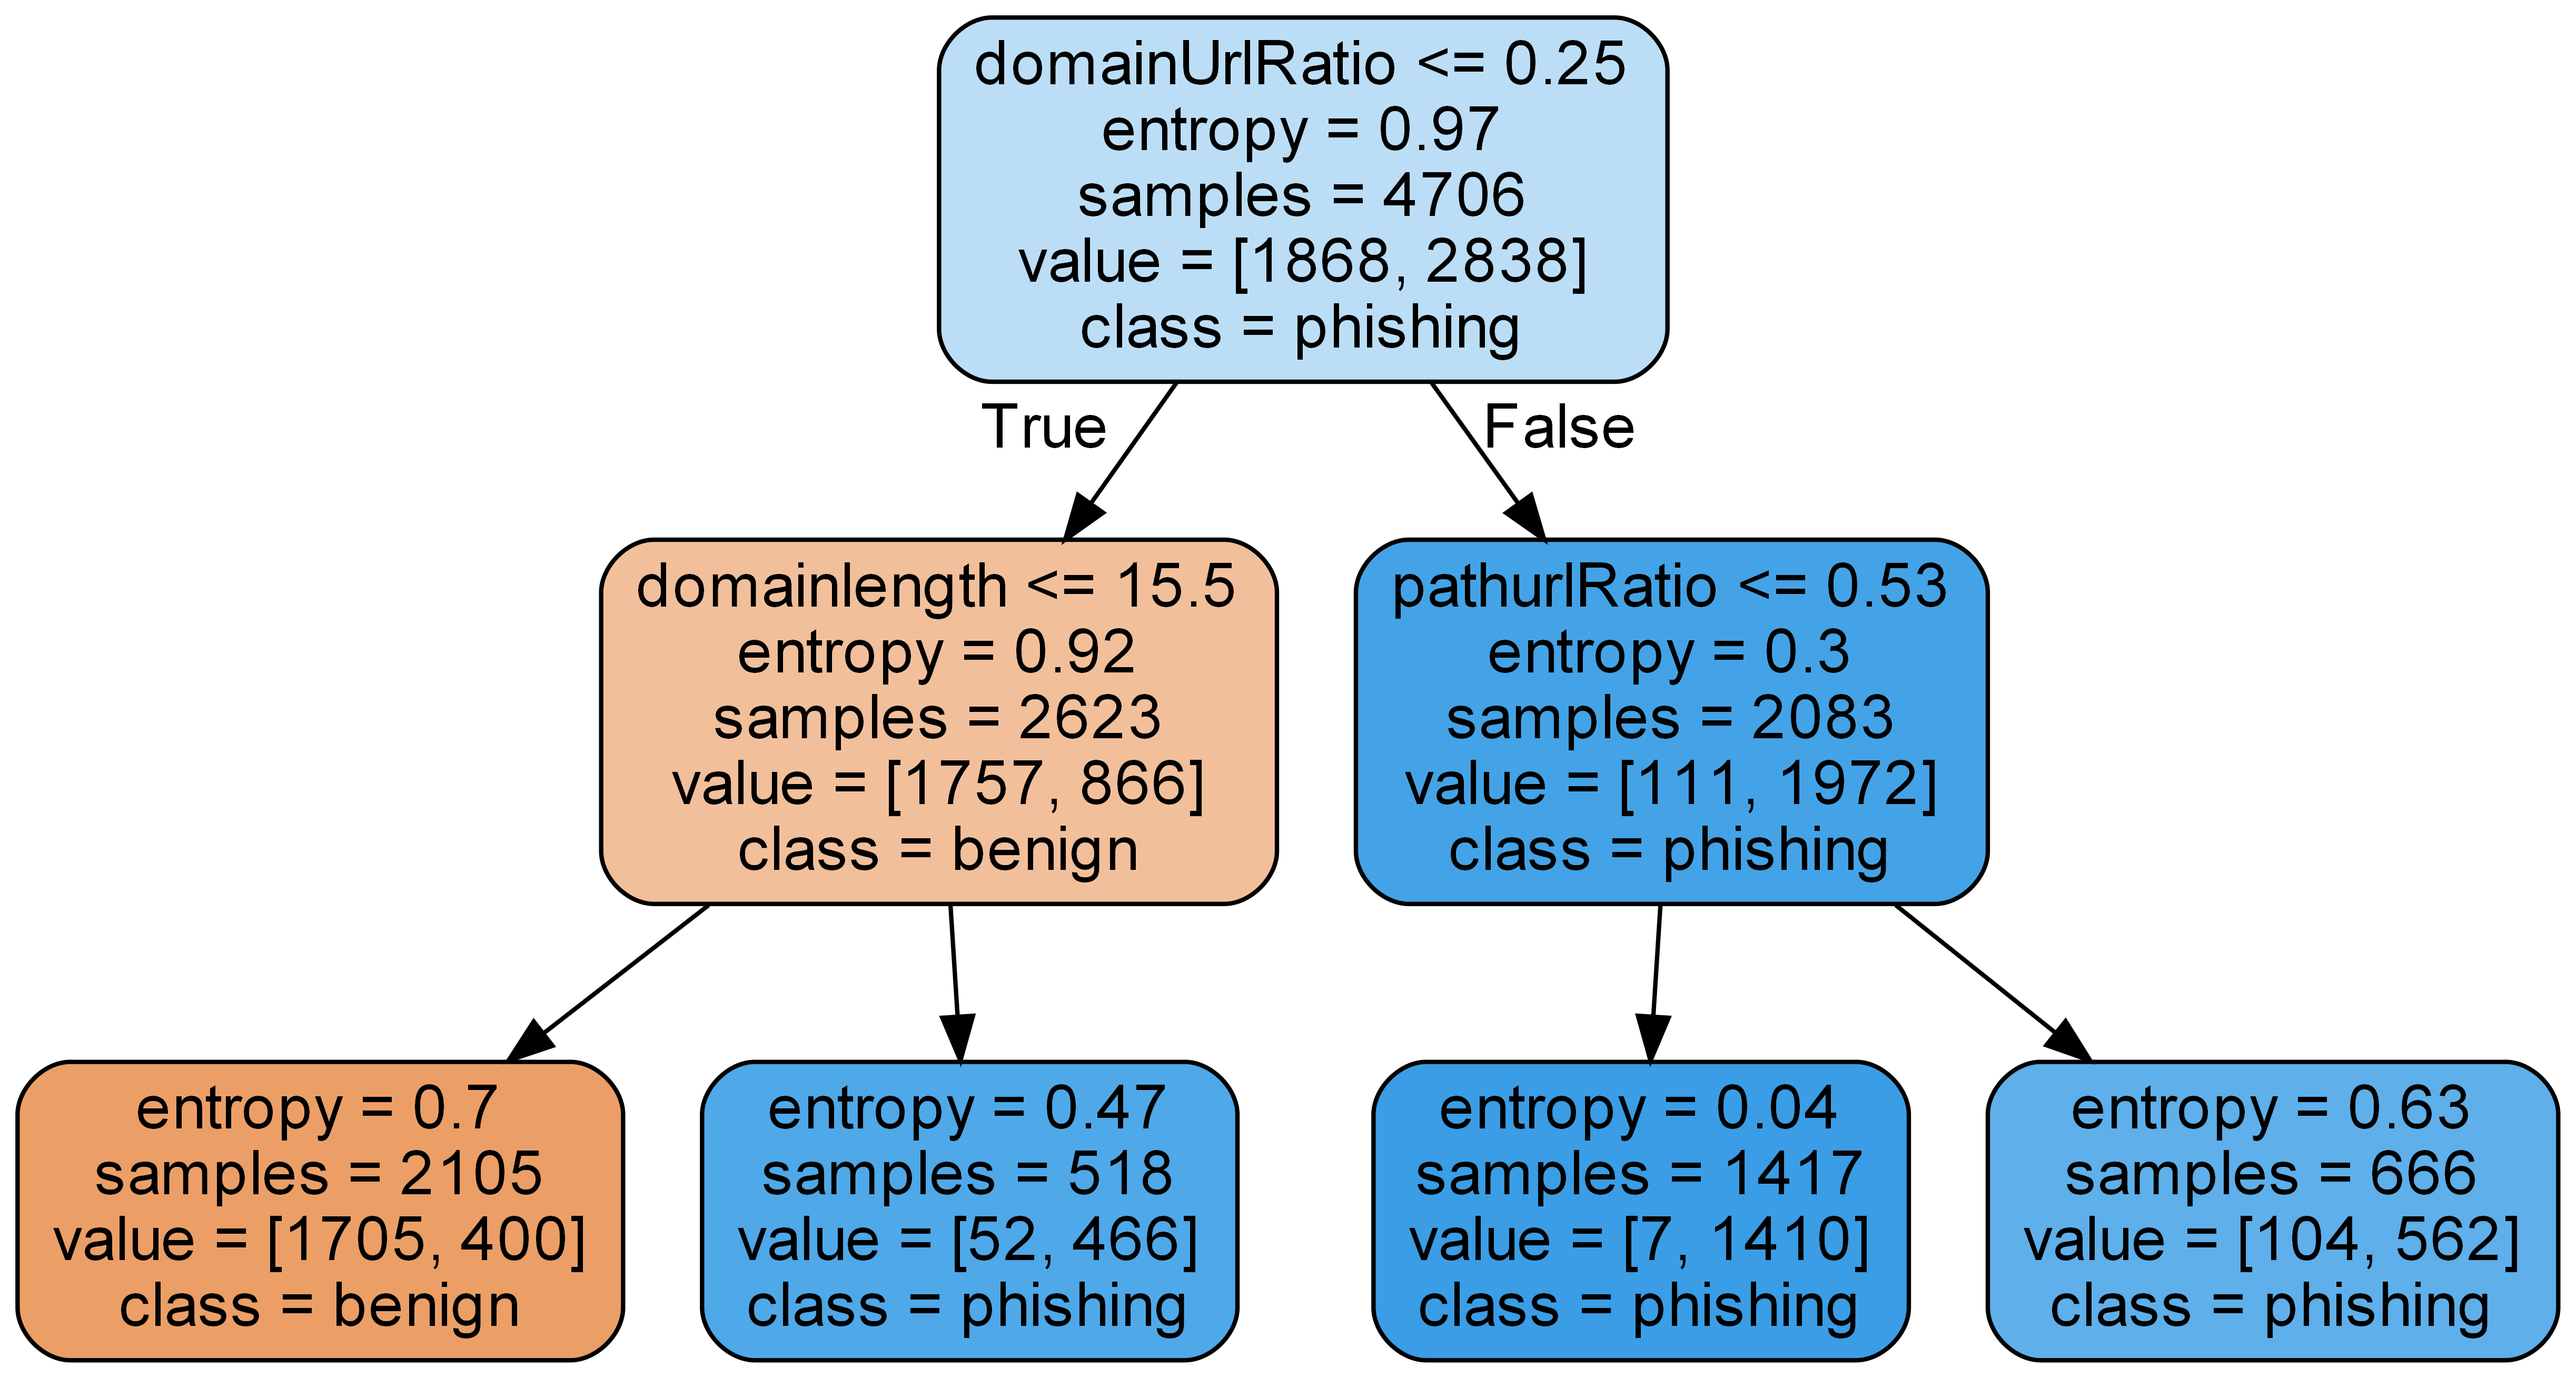

In [51]:
# visualize the tree
from IPython.display import Image
Image(filename = 'tree_entropy.png')

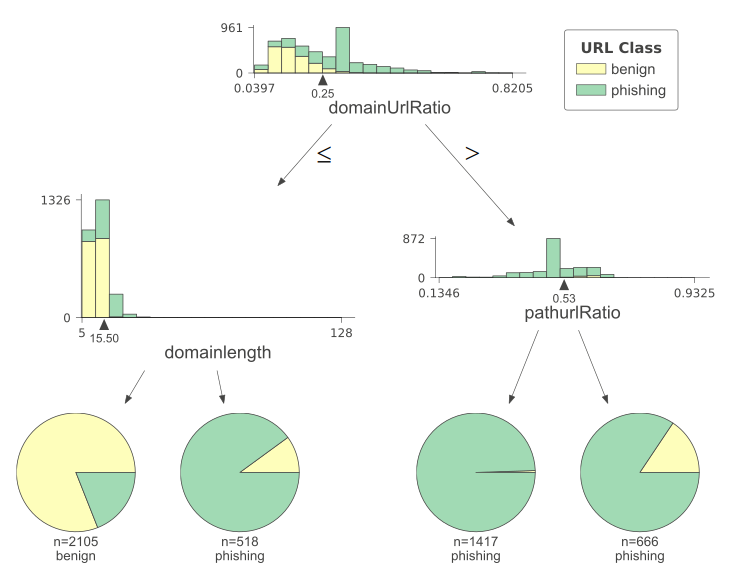

In [61]:
# try a different visual representation of the tree
from dtreeviz.trees import dtreeviz

viz = dtreeviz(tree_entropy2, X_train, y_train,
                target_name="URL Class",
                feature_names=feature_names,
                class_names=list(class_names),scale=2)
viz

## Observation

These two visualizations shows the same results but present the data slightly differently. At first glance, the nodes at each depth and split are hard to read. After conducting some research, it started to make sense. The classifier attempts to find value thresholds and cutoffs that can split the data while decreasing the impurity level. The goal is to get as close to zero as possible when the leafs stop expanding. This is done iteratively until the most important features are identified. Although, over time this process can lead to overfitting and relying on features that are redundant or weak predictors. 

The root node at the top has a phishing class as that is the majority class. DomainURLRatio was chosen as the first feature to help split into additional nodes that decrease the impurity level for this entropy measure. The condition for splitting the dataset is based on whether the domainURLRatio is less than or equal to 0.25. This based on 4,706 samples with 1,868 of them belonging to the benigh class and the remainder to phishing. The impurity level is high at 0.97. If the condition is true (domainUrlRatio <=0.25), then the domainlength is the next feature chosen to split the dataset with its own respective condition. Since we chose a depth of two, this continues for two nodes and the dataset continues being split based on a conditional test and the boolean result separates the data further.

Interestingly, this exercise showed that the phishing class which is the majority class is a lot bigger in terms of samples than benign. The original dataset was more balanced where benign had slightly more samples. This could explain the fairly low accuracy as an imbalanced dataset tends to skew towards the majority class. We inadvertantly created this imbalance when we dropped NaN values which were predominantly of the benign class.


## Additional Exploration

In the previous section, we identified the imbalance in the dataset. We can try to account for this by using the original dataset with NaN values and filling them with the mean of the non-null values. Then we can slightly random undersample the data to end up with an even split. Over that, we can rerun the entropy and gini models with a depth of two to see the accuracy. We can also plot the decision tree for the better performing one and the confusion matrix to see how it compares.

In [62]:
# Let us plot the confusion matrix to compare predictions against the true Y
from sklearn.metrics import confusion_matrix

y_pred = tree_entropy2.predict(X_train)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

ValueError: Found input variables with inconsistent numbers of samples: [2017, 4706]